<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/1_getting_started_roadmap/8_expert_mode/3)%20Create%20experiment%20from%20scratch%20-%20Keras%20backend%20-%20train%2C%20validate%2C%20infer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goals


### Learn how to use full potential of monk in it's expert mode

# Table of Contents


## [0. Install](#0)


## [1. Load data, setup model, select params, and Train](#1)


## [2. Run validation on trained classifier](#2)


## [3. Run inferencing on trained classifier](#3)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [1]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (219/219), done.
remote: Total 2921 (delta 128), reused 44 (delta 20), pack-reused 2682
Receiving objects: 100% (2921/2921), 81.09 MiB | 2.22 MiB/s, done.
Resolving deltas: 100% (1673/1673), done.


In [ ]:
# Select the requirements file as per OS and CUDA version
!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

## Dataset - Natural Images Classification
    - https://www.kaggle.com/prasunroy/natural-images

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sbQ_KaEDd7kRrTvna-4odLqxM2G0QT0Z' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1sbQ_KaEDd7kRrTvna-4odLqxM2G0QT0Z" -O natural-images.zip && rm -rf /tmp/cookies.txt

In [3]:
! unzip -qq natural-images.zip

# Imports

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
#Using keras backend 
from keras_prototype import prototype

<a id='1'></a>
# Load data, setup model, select params, and Train

In [3]:
gtf = prototype(verbose=1);
gtf.Prototype("project", "expert_mode");

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Experiment Details
    Project: project
    Experiment: expert_mode
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/8_expert_mode/workspace/project/expert_mode/



## Set Data params

In [4]:
gtf.Dataset_Params(dataset_path="natural-images/train", 
                   
                   split=0.9,
                    
                   input_size=224, 
                   
                   batch_size=16, 
                   
                   shuffle_data=True, 
                   
                   num_processors=3);

Dataset Details
    Train path:     natural-images/train
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  16
    Data Shuffle: True
    Processors:   3
    Train-val split:   0.9



## Apply Transforms

In [5]:
gtf.apply_random_horizontal_flip(train=True, val=True);

## Load Dataset

In [6]:
gtf.Dataset();

Found 6214 images belonging to 8 classes.
Found 685 images belonging to 8 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}]

Dataset Numbers
    Num train images: 6214
    Num val images:   685
    Num classes:      8



## Set Model Params

In [7]:
gtf.Model_Params(model_name="resnet50", 
                 
                 freeze_base_network=True, 
                 
                 use_gpu=True, 
                 
                 use_pretrained=True);

Model Params
    Model name:           resnet50
    Use Gpu:              True
    Gpu Memory Fraction:  0.5
    Use pretrained:       True
    Freeze base network:  True



## Load Model

In [8]:
gtf.Model();

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num layers in model:  108
        Num trainable layers: 2



## Set Training params

In [9]:
gtf.Training_Params(num_epochs=5, 
                    
                    display_progress=True, 
                    
                    display_progress_realtime=True, 
        
                    save_intermediate_models=True, 
                    
                    intermediate_model_prefix="intermediate_model_", 
                    
                    save_training_logs=True);

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



In [26]:
## Set Optimizer, losses and learning rate schedulers

In [14]:
gtf.optimizer_sgd(0.0001);

Optimizer
    Name:          sgd
    Learning rate: 0.0001
    Params:        {'lr': 0.0001, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}





In [15]:
gtf.lr_fixed();

Learning rate scheduler
    Name:   fixed
    Params: {}



In [16]:
gtf.loss_crossentropy()

Loss
    Name:          crossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}



In [17]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
Epoch 1/5
388/388 [==============================] - 26s 68ms/step - loss: 0.1373 - acc: 0.9699 - val_loss: 0.0876 - val_acc: 0.9777

Epoch 00001: saving model to workspace/project/expert_mode/output/models/resume_state.h5

Epoch 00001: val_loss improved from inf to 0.08764, saving model to workspace/project/expert_mode/output/models/best_model.h5

Epoch 00001: saving model to workspace/project/expert_mode/output/models/intermediate_model_01.h5
Epoch 2/5
388/388 [==============================] - 25s 63ms/step - loss: 0.1254 - acc: 0.9736 - val_loss: 0.0892 - val_acc: 0.9746

Epoch 00002: saving model to workspace/project/expert_mode/output/models/resume_state.h5

Epoch 00002: val_loss did not improve from 0.08764

Epoch 00002: saving model to workspace/project/expert_mode/output/models/intermediate_model_02.h5
Epoch 3/5
388/388 [==============================] - 25s 64ms/step - loss: 0.1260 - acc: 0.9704 - val_loss: 0.0871 - val_acc: 0.9761

Epoch 00003: saving model to

KeyboardInterrupt: 

<a id='2'></a>
# Validating the trained classifier

In [31]:
gtf = prototype(verbose=1);
gtf.Prototype("project", "expert_mode", eval_infer=True);

# Just for example purposes, validating on the training set itself
gtf.Dataset_Params(dataset_path="natural-images/train");
gtf.Dataset();

accuracy, class_based_accuracy = gtf.Evaluate();

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Model Details
    Loading model - workspace/project/expert_mode/output/models/final.h5
    Model loaded!

Experiment Details
    Project: project
    Experiment: expert_mode
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/8_expert_mode/workspace/project/expert_mode/

Dataset Details
    Test path:     natural-images/train
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   3

Found 6899 images belonging to 8 classes.
Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 6899
    Num classes:      8

Testing
6899/6899 [==============================] - 103s 15ms/step

    Result
        class based accuracies
            0. airplane - 0.0 %
            1. car - 0.0 %
            2. cat - 0.4519774011299435 %
            3. dog - 0.0 %
  

<a id='3'></a>
# Running inference on test images

In [32]:
gtf = prototype(verbose=1);
gtf.Prototype("project", "expert_mode", eval_infer=True);

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Model Details
    Loading model - workspace/project/expert_mode/output/models/final.h5
    Model loaded!

Experiment Details
    Project: project
    Experiment: expert_mode
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/8_expert_mode/workspace/project/expert_mode/



Prediction
    Image name:         natural-images/test/test3.jpg
    Predicted class:      flower
    Predicted score:      0.6599844694137573



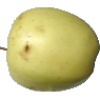

In [35]:
img_name = "natural-images/test/test3.jpg";
predictions = gtf.Infer(img_name=img_name);

#Display 
from IPython.display import Image
Image(filename=img_name) 

Prediction
    Image name:         natural-images/test/test2.jpg
    Predicted class:      cat
    Predicted score:      13.884509086608887



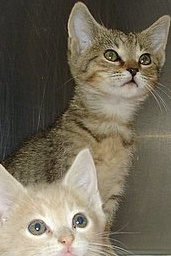

In [20]:
img_name = "natural-images/test/test2.jpg";
predictions = gtf.Infer(img_name=img_name);

#Display 
from IPython.display import Image
Image(filename=img_name) 

Prediction
    Image name:         natural-images/test/test3.jpg
    Predicted class:      fruit
    Predicted score:      8.16602611541748



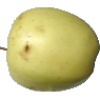

In [21]:
img_name = "natural-images/test/test3.jpg";
predictions = gtf.Infer(img_name=img_name);

#Display 
from IPython.display import Image
Image(filename=img_name) 